## Check parcellation results

The results of running the `src/parcellation.py` script is `parcellation.h5` for each age groups contains the time series for each participant and the atlas labels

**Lest explore the parcellation results**


### 1. Import libraries

In [1]:
# Add the parent directory to the Python path
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '../'))

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import libraries
import matplotlib.pyplot as plt
from src.fc_measure import PearsonCorrelation, CrossCorrelationStatmodels, CrossCorrelationNumpy, \
    MutualInformation, Coherence, WaveletCoherence, EuclideanDistance, CityblockDistance, \
    EarthMoversDistance, DynamicTimeWarping
from src.utils import read_h5_parcellation, plot_ts, parcellation2list, plot_corr_matrices


# Constant variables
ADULTS_PARCELLATION_FILE = '../../results/parcellation/aal/adults_parcellation.h5'

### 2. Load the file with parcellation results

In [2]:
adults_ts, adults_labels = read_h5_parcellation(ADULTS_PARCELLATION_FILE)

print(f'Shape of the parcelled data for adults: {adults_ts.shape}')
print(f'Shape of the atlas regions: {adults_labels.shape}')

Shape of the parcelled data for adults: (45, 239, 116)
Shape of the atlas regions: (45, 116)


### 3. Plot time series

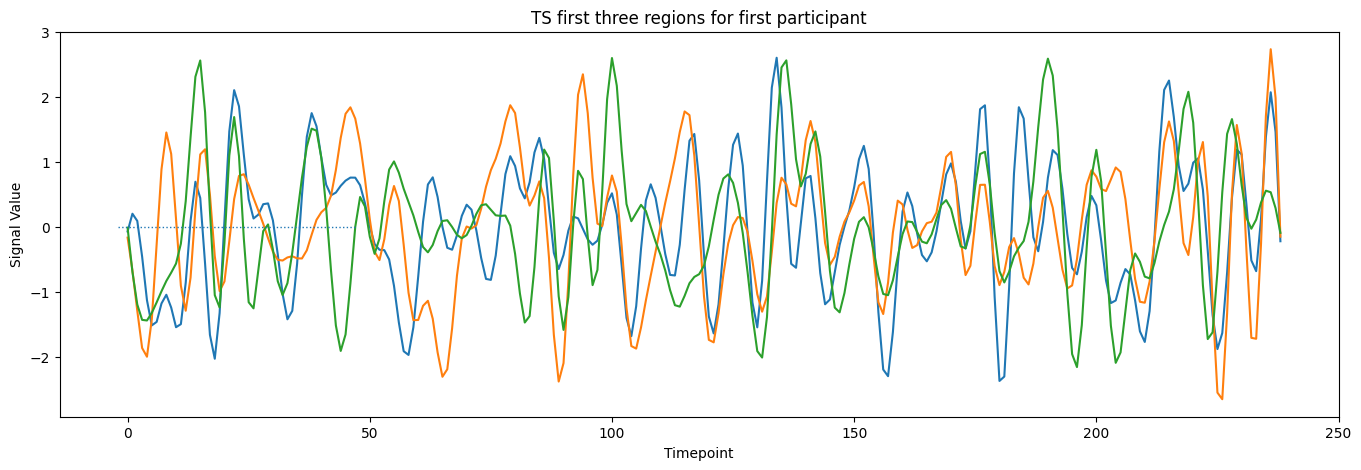

In [3]:
plot_ts(adults_ts[0][:,0:3], 
        title='TS first three regions for first participant')
plt.hlines(0, -2, adults_ts[:,0:3].shape[0]+2, 
           linewidth=1.0, linestyles="dotted")

In [4]:
# Prepare time series
adults_ts_list = parcellation2list(adults_ts)

### 4. Calculate Pearson correlation

In [15]:
pearson_correlation = PearsonCorrelation()
pearson_adults_matr = pearson_correlation.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {pearson_adults_matr.shape}')
print(f'Connectivity matrices type: {type(pearson_adults_matr)}')

2023-05-16 15:19:44,021 - ConnectivityMeasure - INFO - Calculating Pearson correlation


Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


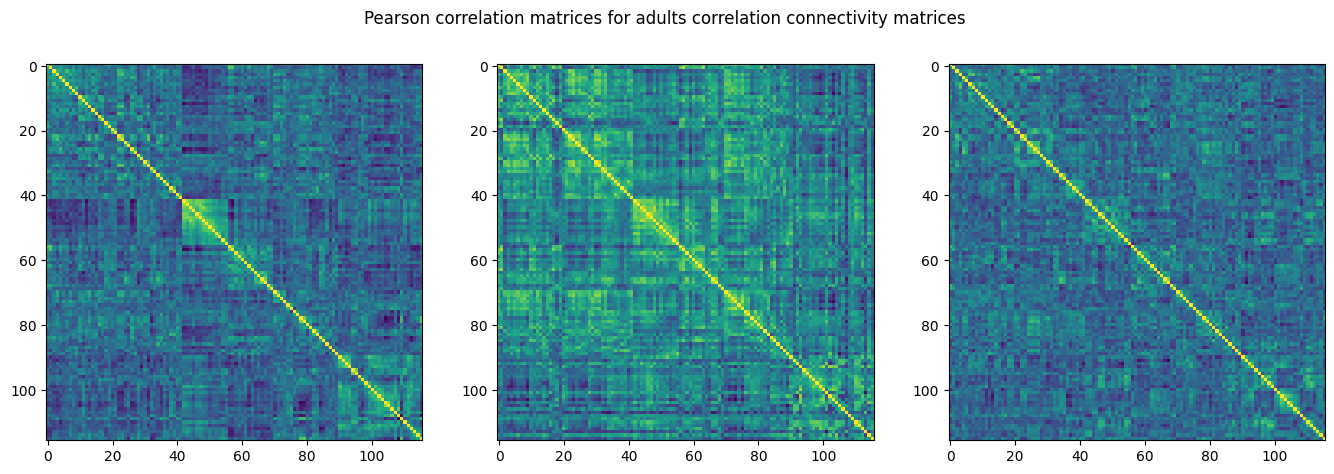

In [16]:
plot_corr_matrices(matrices=pearson_adults_matr,
                   title="Pearson correlation matrices for adults")

In [7]:
pearson_adults_matr[0].max()

1.0

In [8]:
adults_ts_list[0].shape[1]

116

In [9]:
len(adults_ts_list)

45

In [10]:
adults_ts_list[0][3].shape

(116,)

### 5. Calculate Cross correlation

2023-05-16 15:18:22,484 - ConnectivityMeasure - INFO - Calculating cross correlation
100%|███████████████████████████████████████████| 45/45 [00:20<00:00,  2.24it/s]


Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


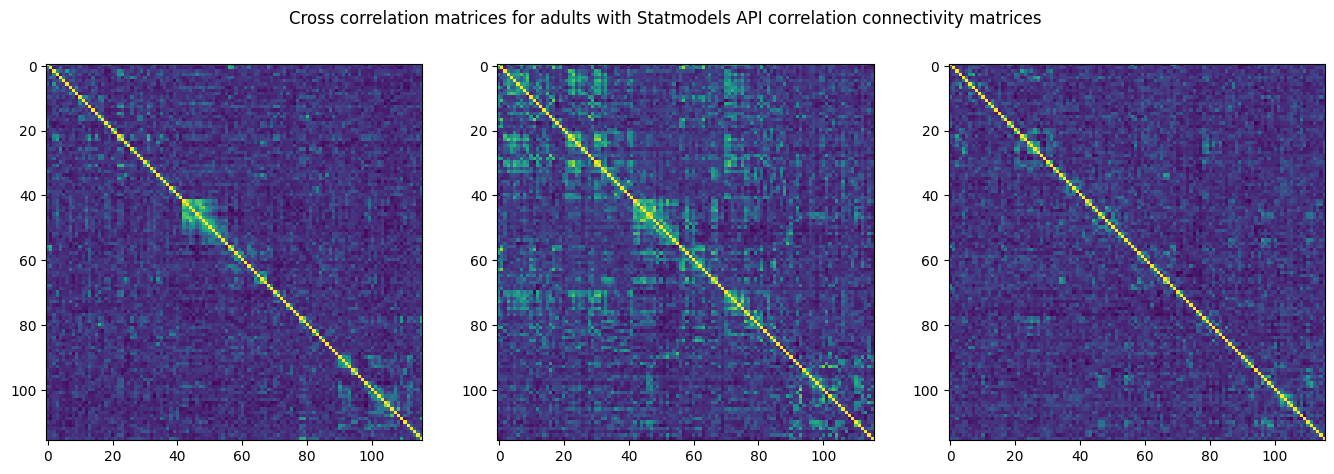

In [11]:
cross_corr_statmodels = CrossCorrelationStatmodels()
cross_corr_stat = cross_corr_statmodels.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {cross_corr_stat.shape}')
print(f'Connectivity matrices type: {type(cross_corr_stat)}')

plot_corr_matrices(matrices=cross_corr_stat,
                   title="Cross correlation matrices for adults with Statmodels API")

In [12]:
cross_corr_stat[0].max()

1.0

### 6. Mutual Information

2023-05-16 15:19:03,361 - ConnectivityMeasure - INFO - Calculating mutual information
100%|███████████████████████████████████████████| 45/45 [00:38<00:00,  1.18it/s]

Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


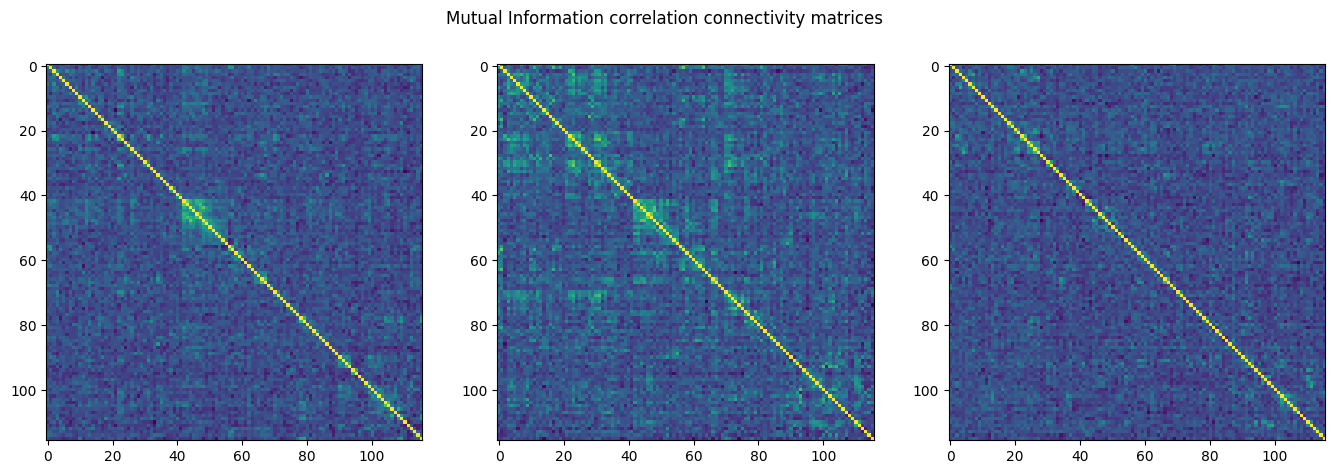

In [14]:
mi = MutualInformation()
mi_mat = mi.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {mi_mat.shape}')
print(f'Connectivity matrices type: {type(mi_mat)}')

plot_corr_matrices(matrices=mi_mat,
                   title="Mutual Information")

In [17]:
mi_mat[0].max()

1.0

### 7. Coherence

2023-05-16 15:19:57,316 - ConnectivityMeasure - INFO - Calculating coherence
100%|███████████████████████████████████████████| 45/45 [00:57<00:00,  1.28s/it]


Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


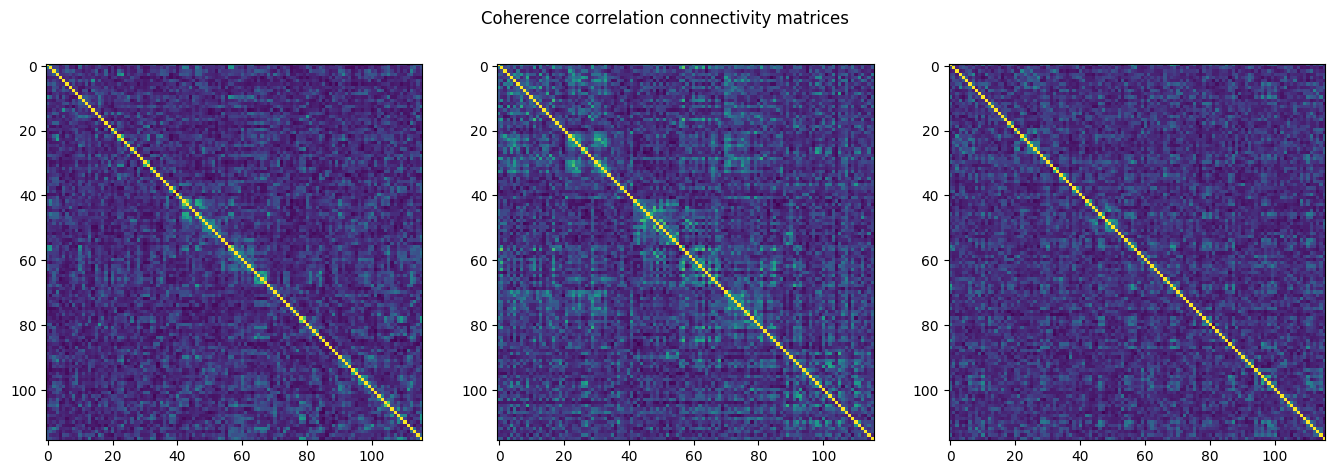

In [18]:
coherence = Coherence()
coherence_mat = coherence.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {coherence_mat.shape}')
print(f'Connectivity matrices type: {type(coherence_mat)}')

plot_corr_matrices(matrices=coherence_mat,
                   title="Coherence")

In [20]:
coherence_mat[0].max()

1.0

### 8. Euclidean Distance

2023-05-16 15:23:51,594 - ConnectivityMeasure - INFO - Calculating euclidean distance
100%|███████████████████████████████████████████| 45/45 [00:01<00:00, 34.48it/s]


Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


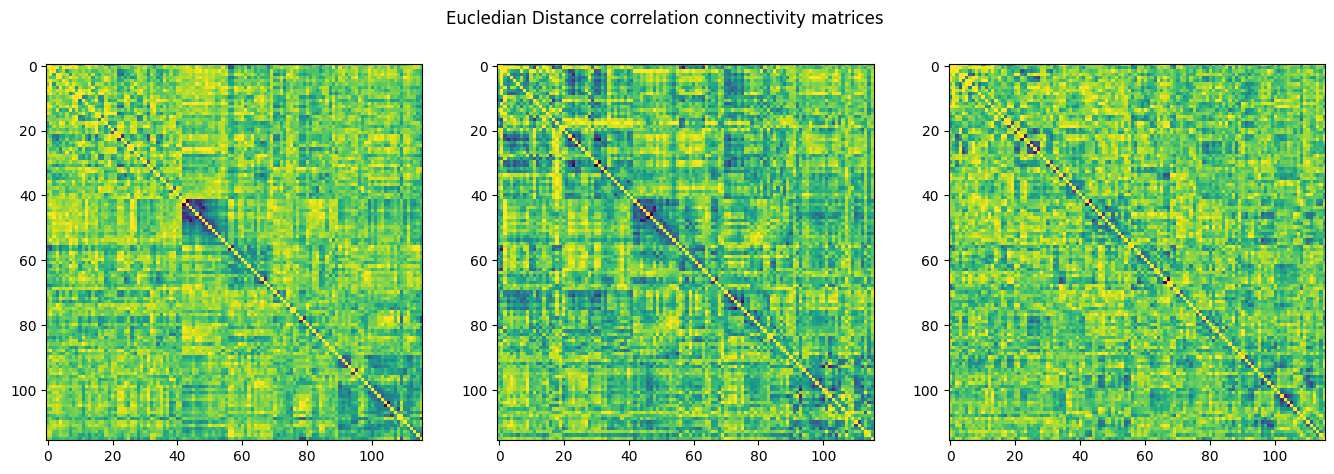

In [21]:
eucledian_distance = EuclideanDistance()
eucledian_distance_mat = eucledian_distance.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {eucledian_distance_mat.shape}')
print(f'Connectivity matrices type: {type(eucledian_distance_mat)}')

plot_corr_matrices(matrices=eucledian_distance_mat,
                   title="Eucledian Distance")

In [22]:
eucledian_distance_mat[0].max()

1.0

### 9. Cityblock Distance

2023-05-16 15:23:55,943 - ConnectivityMeasure - INFO - Calculating cityblock distance
100%|███████████████████████████████████████████| 45/45 [00:00<00:00, 46.23it/s]


Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


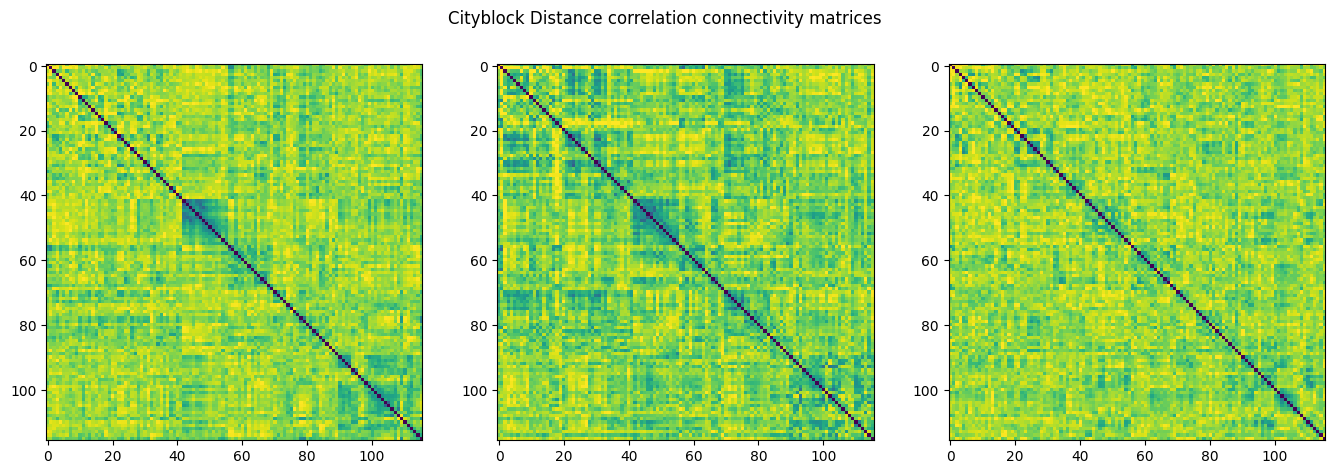

In [23]:
cityblock_distance = CityblockDistance()
cityblock_distance_mat = cityblock_distance.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {cityblock_distance_mat.shape}')
print(f'Connectivity matrices type: {type(cityblock_distance_mat)}')

plot_corr_matrices(matrices=cityblock_distance_mat,
                   title="Cityblock Distance")

In [24]:
cityblock_distance_mat[0].max()

1.0

### 10. EarthMoversDistance

2023-05-16 15:24:01,045 - ConnectivityMeasure - INFO - Calculating earth mover's distance
100%|███████████████████████████████████████████| 45/45 [00:27<00:00,  1.63it/s]

Adults connectivity matrices shape: (45, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


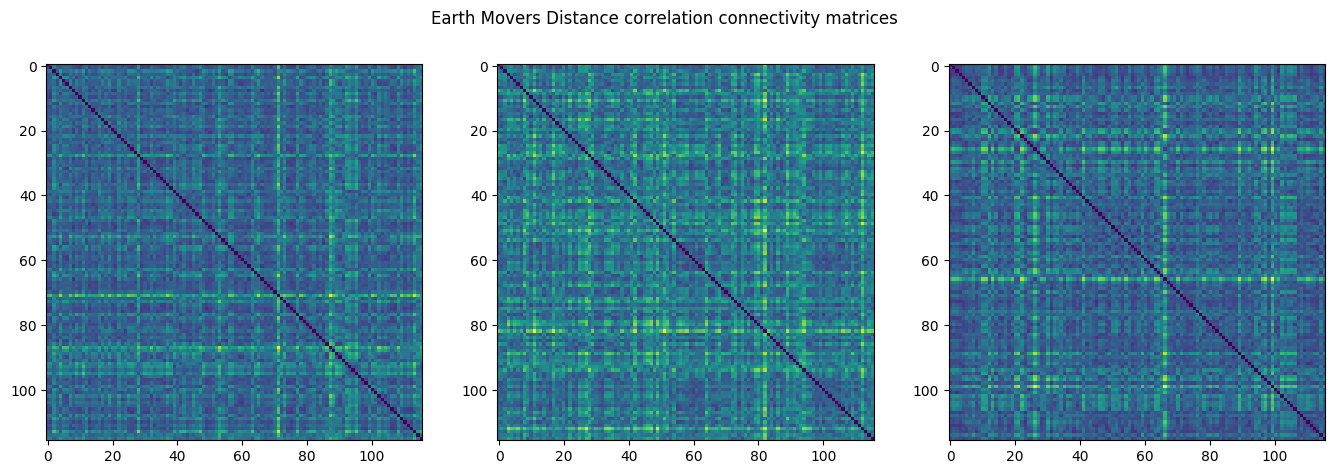

In [25]:
# Min/Max
earth_movers_dist = EarthMoversDistance()
earth_movers_dist_mat = earth_movers_dist.calculate(adults_ts_list)

print(f'Adults connectivity matrices shape: {earth_movers_dist_mat.shape}')
print(f'Connectivity matrices type: {type(earth_movers_dist_mat)}')

plot_corr_matrices(matrices=earth_movers_dist_mat,
                   title="Earth Movers Distance")

In [26]:
earth_movers_dist_mat[0].max()

0.25063065725240363

In [27]:
earth_movers_dist_mat[0].min()

0.0

### 11. Dynamic Time Warping

2023-05-16 15:24:36,341 - ConnectivityMeasure - INFO - Calculating dynamic time warping
100%|████████████████████████████████████████████| 3/3 [06:20<00:00, 126.79s/it]

Adults connectivity matrices shape: (3, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


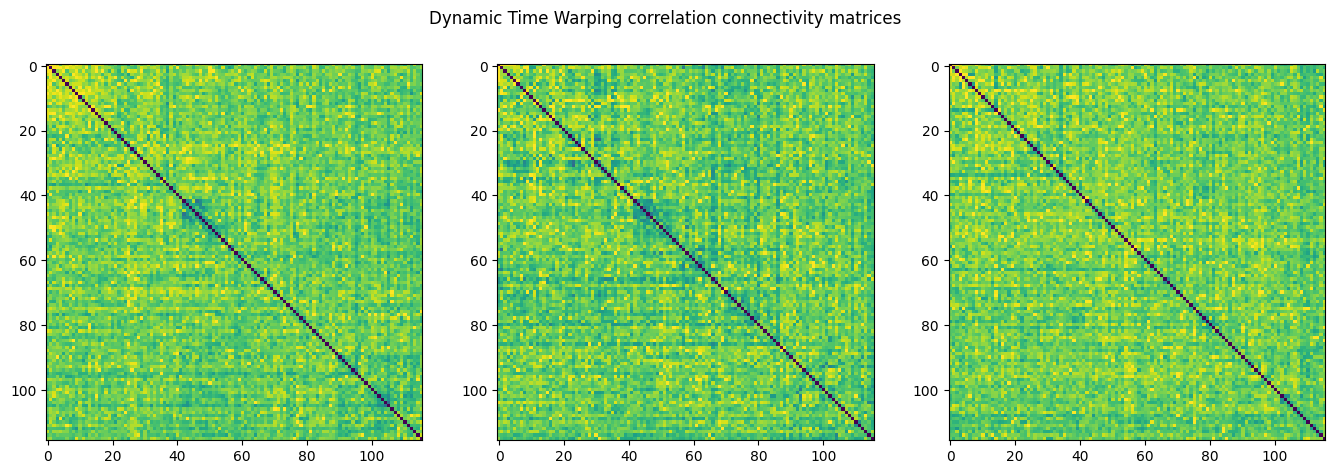

In [28]:
dynamic_time_warp = DynamicTimeWarping()
dynamic_time_warp_mat = dynamic_time_warp.calculate(adults_ts_list[:3])

print(f'Adults connectivity matrices shape: {dynamic_time_warp_mat.shape}')
print(f'Connectivity matrices type: {type(dynamic_time_warp_mat)}')

plot_corr_matrices(matrices=dynamic_time_warp_mat,
                   title="Dynamic Time Warping")

### 12. Wavelet Coherence

2023-05-16 15:34:54,030 - ConnectivityMeasure - INFO - Calculating wavelet coherence
100%|████████████████████████████████████████████| 3/3 [08:33<00:00, 171.18s/it]


Adults connectivity matrices shape: (3, 116, 116)
Connectivity matrices type: <class 'numpy.ndarray'>


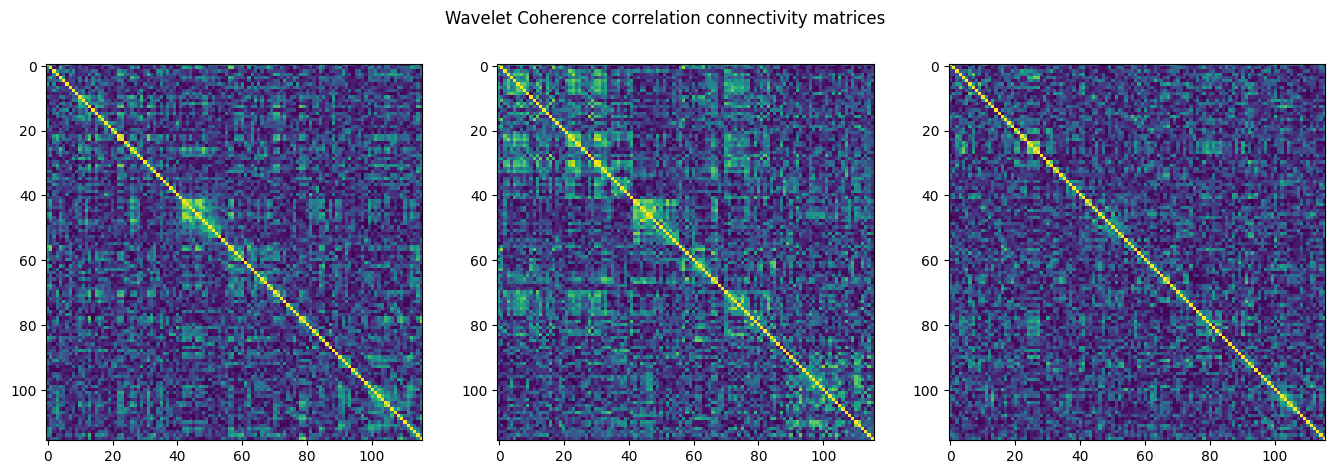

In [29]:
wavelet_coherence = WaveletCoherence()
wavelet_coherence_mat = wavelet_coherence.calculate(adults_ts_list[:3])

print(f'Adults connectivity matrices shape: {wavelet_coherence_mat.shape}')
print(f'Connectivity matrices type: {type(wavelet_coherence_mat)}')

plot_corr_matrices(matrices=wavelet_coherence_mat,
                   title="Wavelet Coherence")